In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
data.head()


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [28]:

data.describe()


,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


* Create a function to convert numerical values of the Index column to categorical values.

In [29]:


def give_names_to_indices(ind):
    if ind==0:
        return 'Extremely Weak'
    elif ind==1:
        return 'Weak'
    elif ind==2:
        return 'Normal'
    elif ind==3:
        return 'OverWeight'
    elif ind==4:
        return 'Obesity'
    elif ind==5:
        return 'Extremely Obese'



In [30]:

data['Index'] = data['Index'].apply(give_names_to_indices)  #Apply a function along an axis of the DataFrame
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,OverWeight
4,Male,149,61,OverWeight


<ul>
<li><span style="color: #00ccff;">Let&rsquo;s plot height vs weight and color them according to their weight category. We are using sns.lmplot which is just a scatter plot or we can say a regression plot</span></li>
</ul>

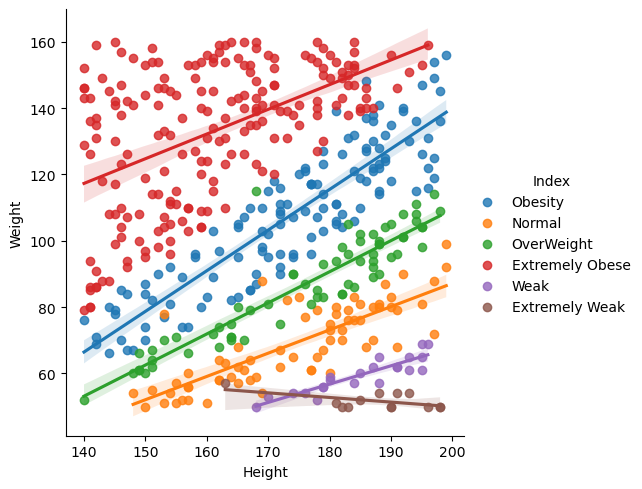

In [31]:


# sns.lmplot(data=data,x= 'Height',y= 'Weight',hue='Index', size=7,aspect=1,fit_reg=False)
sns.lmplot(data=data,x= 'Height',y= 'Weight',hue='Index')   #linear model plot I think


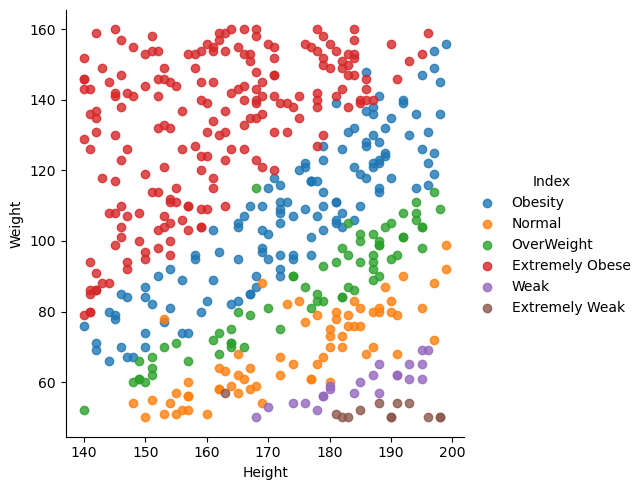

In [32]:
sns.lmplot(data=data,x= 'Height',y= 'Weight',hue='Index',fit_reg=False )

In [33]:


people = data['Gender'].value_counts()  #Return a Series containing counts of unique values
print(type(people))
people


<class 'pandas.core.series.Series'>


Female    255
Male      245
Name: Gender, dtype: int64

In [34]:

categories = data['Index'].value_counts()
categories


Extremely Obese    198
Obesity            130
Normal              69
OverWeight          68
Weak                22
Extremely Weak      13
Name: Index, dtype: int64

<ul>
<li><span style="color: #ffff99;">Let&rsquo;s analyze weight category distribution according to gender</span></li>
</ul>

In [35]:

# STATS FOR MEN
s1=data[data['Gender']=='Male']['Index'].value_counts()

# STATS FOR WOMEN
s2=data[data['Gender']=='Female']['Index'].value_counts()
print('Men stats:\n',s1)
print('Women stats:\n',s2)

Men stats:
 Extremely Obese    105
Obesity             59
OverWeight          32
Normal              28
Weak                15
Extremely Weak       6
Name: Index, dtype: int64
Women stats:
 Extremely Obese    93
Obesity            71
Normal             41
OverWeight         36
Weak                7
Extremely Weak      7
Name: Index, dtype: int64


<ul>
<li><span style="color: #ffff00;">We can&rsquo;t give our model categorical features. so we will create&nbsp;<a style="color: #ffff00;" href="https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html" target="_blank" rel="noreferrer noopener">dummy variables&nbsp;</a>out of the Gender column</span></li>
</ul>

In [36]:
data2 = pd.get_dummies(data['Gender'])
print(type(data2))
data2


<class 'pandas.core.frame.DataFrame'>


,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
495,1,0
496,1,0
497,1,0
498,0,1


In [37]:

data.drop('Gender',axis=1,inplace=True)
data = pd.concat([data,data2],axis=1)
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,Height,Weight,Index,Female,Male
0,174,96,Obesity,0,1
1,189,87,Normal,0,1
2,185,110,Obesity,1,0
3,195,104,OverWeight,1,0
4,149,61,OverWeight,0,1


Creating y data which will be our Index column

In [38]:

y=data['Index'] 
data =data.drop(['Index'],axis=1)   #train data


<ul>
<li><span style="color: #ffff00;">We are declaring a&nbsp;<a style="color: #ffff00;" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html" target="_blank" rel="noreferrer noopener">Standard Scaler&nbsp;</a>and scaling our data to bring everything on the same scale /range. This will help increase our model&rsquo;s accuracy and will also help in faster training.</span></li>
</ul>

In [39]:

scaler = StandardScaler()   #Standardize features by removing the mean and scaling to unit variance.
data = scaler.fit_transform(data)
data

array([[ 0.24793878, -0.30911702, -1.02020406,  1.02020406],
       [ 1.16487212, -0.58732233, -1.02020406,  1.02020406],
       [ 0.92035656,  0.12364681,  0.98019606, -0.98019606],
       ...,
       [-1.76931458,  0.92735105,  0.98019606, -0.98019606],
       [-1.21915457, -0.34002872, -1.02020406,  1.02020406],
       [ 0.18680989,  0.77279254, -1.02020406,  1.02020406]])

In [40]:

data=pd.DataFrame(data) #?????? data is already a dataframe
data


,0,1,2,3
0,0.247939,-0.309117,-1.020204,1.020204
1,1.164872,-0.587322,-1.020204,1.020204
2,0.920357,0.123647,0.980196,-0.980196
3,1.531645,-0.061823,0.980196,-0.980196
4,-1.280283,-1.391027,-1.020204,1.020204
...,...,...,...,...
495,-1.219155,1.452850,0.980196,-0.980196
496,0.859228,0.463676,0.980196,-0.980196
497,-1.769315,0.927351,0.980196,-0.980196
498,-1.219155,-0.340029,-1.020204,1.020204


In [41]:

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=101)


<ul>
<li><span style="color: #ffff00;">We could have simply declared our Random forest model with any no. of estimators but by using&nbsp;<a style="color: #ffff00;" href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" target="_blank" rel="noreferrer noopener">Grid Search CV&nbsp;</a>we can train our random forest model on multiple n_estimators values like firstly random forest will have n_estimators as 100, the second time it will have it as 200 and so on and we can check that which n_estimator is giving highest accuracy. grid_cv will automatically become the best random forest model</span></li>
</ul>

<div>
<h3><span style="color: #00ff00;">sklearn.ensemble.RandomForestClassifier</span></h3>
</div>
<ul>
<li><strong><span style="color: #ffff00;">max_features{&ldquo;sqrt&rdquo;, &ldquo;log2&rdquo;, None}, int or float, default=&rdquo;sqrt&rdquo;</span></strong>
<ul>
<li><span style="color: #00ccff;">The number of features to consider when looking for the best split</span></li>
</ul>
</li>
<li><span style="color: #ffff00;"><strong>bootstrap:<span class="classifier">bool, default=True</span></strong></span>
<ul>
<li><span style="color: #00ccff;"><span class="classifier">Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree</span></span></li>
</ul>
</li>
<li><span style="color: #ffff00;"><span class="classifier"><strong>max_samples:</strong>int or float, default=None</span></span>
<ul>
<li><span style="color: #00ccff;"><span class="classifier">If bootstrap is True, the number of samples to draw from X to train each base estimator--&gt;If None (default), then draw&nbsp;<code class="docutils literal notranslate"><span class="pre">X.shape[0]</span></code>&nbsp;samples</span></span></li>
</ul>
</li>
<li><span style="color: #ffff00;"><span class="classifier"><strong>random_state:</strong>int, RandomState instance or None, default=None</span></span>
<ul>
<li><span style="color: #00ccff;"><span class="classifier">Controls both the randomness of the bootstrapping of the samples used when building trees (if&nbsp;<code class="docutils literal notranslate"><span class="pre">bootstrap=True</span></code>) and the sampling of the features to consider when looking for the best split at each node (if&nbsp;<code class="docutils literal notranslate"><span class="pre">max_features</span>&nbsp;<span class="pre">&lt;</span>&nbsp;<span class="pre">n_features</span></code>)</span></span></li>
</ul>
</li>
</ul>

<h3><span style="color: #00ff00;"><a style="color: #00ff00;" title="sklearn.model_selection" href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection">sklearn.model_selection</a>.GridSearchCV</span></h3>
<ul>
<li><span style="color: #ffff99;"><strong>param_grid:</strong><span class="classifier">dict or list of dictionaries</span></span>
<ul>
<li><span style="color: #00ccff;"><span class="classifier">Dictionary with parameters names (<code class="docutils literal notranslate"><span class="pre">str</span></code>) as keys and lists of parameter settings to try as values, or a list of such dictionaries</span></span></li>
</ul>
</li>
<li><span style="color: #ffff99;"><span class="classifier"><strong>verbose:</strong>int</span></span>
<ul>
<li><span style="color: #00ccff;"><span class="classifier">Controls the verbosity: the higher, the more messages</span></span></li>
</ul>
</li>
<li><span style="color: #ffff99;"><strong><span class="classifier"><span class="sig-name descname"><span class="pre">fit</span></span><span class="sig-paren">(</span><em class="sig-param"><span class="n"><span class="pre">X</span></span></em>,&nbsp;<em class="sig-param"><span class="n"><span class="pre">y</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">None</span></span></em>,&nbsp;<em class="sig-param"><span class="o"><span class="pre">*</span></span></em>,&nbsp;<em class="sig-param"><span class="n"><span class="pre">groups</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">None</span></span></em>,&nbsp;<em class="sig-param"><span class="o"><span class="pre">**</span></span><span class="n"><span class="pre">fit_params</span></span></em><span class="sig-paren">)</span></span></strong></span>
<ul>
<li><span style="color: #00ccff;"><span class="classifier"><span class="sig-paren">Run fit with all sets of parameters.</span></span></span></li>
</ul>
</li>
<li><span style="color: #ffff99;"><span class="classifier"><span class="sig-paren"><strong>best_params_:</strong>dict</span></span></span>
<ul>
<li><span style="color: #00ccff;"><span class="classifier"><span class="sig-paren">Parameter setting that gave the best results on the hold out data</span></span></span></li>
</ul>
</li>
</ul>

In [42]:

param_grid = {'n_estimators':[100,200,300,400,500,600,700,800,1000]}    
grid_cv = GridSearchCV(RandomForestClassifier(random_state=101),param_grid,verbose=3)   ##The default value of n_estimators changed from 10 to 100 in version 0.22
        
grid_cv.fit(X_train,y_train)

print(grid_cv.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..................n_estimators=100;, score=0.857 total time=   0.3s
[CV 2/5] END ..................n_estimators=100;, score=0.886 total time=   0.1s
[CV 3/5] END ..................n_estimators=100;, score=0.829 total time=   0.1s
[CV 4/5] END ..................n_estimators=100;, score=0.786 total time=   0.1s
[CV 5/5] END ..................n_estimators=100;, score=0.900 total time=   0.1s
[CV 1/5] END ..................n_estimators=200;, score=0.843 total time=   0.3s
[CV 2/5] END ..................n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5] END ..................n_estimators=200;, score=0.843 total time=   0.3s
[CV 4/5] END ..................n_estimators=200;, score=0.829 total time=   0.3s
[CV 5/5] END ..................n_estimators=200;, score=0.886 total time=   0.3s
[CV 1/5] END ..................n_estimators=300;, score=0.843 total time=   0.5s
[CV 2/5] END ..................n_estimators=300;,

In [43]:

# weight category prediction
pred = grid_cv.predict(X_test)


print(classification_report(y_test,pred))   #sklearn.metrics.classification_report


                 precision    recall  f1-score   support

Extremely Obese       0.91      0.97      0.94        63
 Extremely Weak       1.00      1.00      1.00         1
         Normal       0.92      0.96      0.94        23
        Obesity       0.78      0.82      0.79        38
     OverWeight       0.92      0.58      0.71        19
           Weak       0.83      0.83      0.83         6

       accuracy                           0.87       150
      macro avg       0.89      0.86      0.87       150
   weighted avg       0.88      0.87      0.87       150



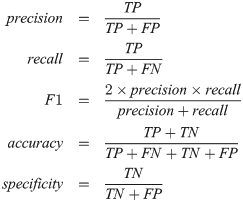
<h3><span style="color: #00ff00;">scoring</span></h3>
<ul>
<li><span style="color: #ffff99;"><strong>accuracy</strong></span><br />
<ul>
<li><span style="color: #00ccff;"><span class="classifier">describing the number of correct predictions over all predictions:(TP+TN)/DatasetSize</span></span></li>
</ul>
</li>
<li><span style="color: #ffff00;"><em class="le">Precision</em></span><br />
<ul>
<li><span style="color: #00ccff;"><em class="le">Precision</em>&nbsp;is a measure of how many of the positive predictions made are correct (true positives)</span></li>
</ul>
</li>
<li><span style="color: #ffff00;"><em class="le">Recall/<a class="af nw" style="color: #ffff00;" href="https://stats.stackexchange.com/questions/362332/is-there-any-difference-between-sensitivity-and-recall" target="_blank" rel="noopener ugc nofollow">Sensitivity</a></em></span><br />
<ul>
<li><span style="color: #00ccff;"><em class="le">Recall</em>&nbsp;is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.&nbsp;</span><a class="af nw" href="https://stats.stackexchange.com/questions/362332/is-there-any-difference-between-sensitivity-and-recall" target="_blank" rel="noopener ugc nofollow"><span style="color: #00ccff;">It is sometimes also referred to as&nbsp;</span><em class="le"><span style="color: #00ccff;">Sensitivity</span></em></a></li>
</ul>
</li>
<li><span style="color: #ffff00;">Specificity</span><br />
<ul>
<li><span style="color: #00ccff;">Specificity is a measure of how many negative predictions made are correct (true negatives)</span></li>
</ul>
</li>
</ul>

In [44]:

print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('Acuuracy is --> ',accuracy_score(y_test,pred)*100)   #sklearn.metrics.accuracy_score
print('\n')




[[61  0  0  2  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0 22  0  0  1]
 [ 6  0  0 31  1  0]
 [ 0  0  1  7 11  0]
 [ 0  0  1  0  0  5]]


Acuuracy is -->  87.33333333333333




A function that will perform all the preprocessing for live prediction in the next step

In [45]:
def lp(details):
    gender = details[0]
    height = details[1]
    weight = details[2]
    
    if gender=='Male':
        details=np.array([[np.float(height),np.float(weight),0.0,1.0]])
    elif gender=='Female':
        details=np.array([[np.float(height),np.float(weight),1.0,0.0]])
    
    y_pred = grid_cv.predict(scaler.transform(details))
    return (y_pred[0])
    


In [46]:
#Live predictor
your_details = ['Male',175,80]
print(lp(your_details))

OverWeight


C:\Users\Mahdi\AppData\Local\Temp\ipykernel_9008\990691185.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  details=np.array([[np.float(height),np.float(weight),0.0,1.0]])
c:\Users\Mahdi\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
